## 🚀 Adaboost


In the lecture, we covered boosting, which is a technique that takes a week classifier (i.e., a model that severely underfits) and transforms it into a strong classifier by making many instances of such classifier and sequentially training them such that each subsequent one learns from the mistakes of the previous ones.

An example of a week classifier is a decision stump. That is, a decision tree with one level. Such classifier is so week as it represents a constant hyperplane perpendicular to one of the axes (features).

$$
h_t(x) =
\begin{cases}
1, & \text{if } x_{\text{k}} > C \\
-1, & \text{otherwise}
\end{cases}
$$

In other words, ordinary linear classifiers take the form $w_1 x_1 + w_2 x_2 + ... +w_n x_n + w_o = 0$. Meanwhile, this classifier takes the form $x_k + w_o=0$. It only learns $w_o$ and attempts to choose the best feature $x_k$ to which the hyperplane will pass through.

### 💪 Training Algorithm

**Initialize the weights:** Set initial weights $w_i = \frac{1}{M}$ for each sample in the training set, where $M$ is the number of samples.

**For each iteration $t$ from 1 to $T$:**

1. **Train a weak classifier $h_t(x)$ using the training set weighted by $w_i$**

$$h_t(x) \leftarrow (x_1, x_2,...,x_m)$$

2. **Compute the error:** Compute the weighted error $\epsilon_t$ of the weak classifier:
   $$\epsilon_t = \sum_{i=1}^{N} w_i \cdot \mathbb{I}(y_i \neq h_t(x_i))$$
3. **Compute the weight $\alpha_t$ of the weak classifier**:
   $$\alpha_t = \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$$
4. **Update the training weights:**:
   $$w_i^{(t+1)} = w_i^{(t)} \cdot \exp(\alpha_t \mathbb{I}(y_i \neq h_t(x_i))$$

5. **Normalize the Weights:**
   $$w_i^{(t+1)} = \frac {w_i^{(t)}}{\sum_{i=1}^{M} w_i^{(t)}}$$

### 🔮 Inference Algorithm

3. **Output the final strong classifier:**
   $$H(x) = \text{argmax}_k(\sum_{t=1}^{T} \alpha_t \mathbb{I}(h_t(x) = k))$$

### 💎 Special Notes

- In general multiclass settings, inference takes place by summing the $α$ of each group of classifier making the same vote for a specific class and then the class with the greatest sum is the final prediction as shown in the equation above. However, for your convenience we are implementing the binary classification version only here. **You should be able to easily show that** in this case if $y ∈ \{+1, -1\}$ the inference equation simplifies to:

$$H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)$$

- Notice that the term $\mathbb{I}(y_i \neq h_t(x_i))$ is used in both steps $(2)$ and $(4)$, we can compute it only once after training and use it in both expressions in the implementation


## 🧪 End-to-end Tests


In [91]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_circles, make_moons
from sklearn.ensemble import AdaBoostClassifier
from Adaboost import Adaboost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test Fit


In [92]:
# Generate data
x_data, y_data = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=2,
    random_state=42,
)
y_data = np.where(y_data == 0, -1, 1)  # Convert labels to -1 and 1

# Training and evaluating the custom AdaBoost
T = 100

# Training and evaluating custom and Scikit Adaboosts:
adaboost_sklearn = AdaBoostClassifier(
    n_estimators=T, random_state=42, algorithm="SAMME"
)
adaboost_sklearn.fit(x_data, y_data)

adaboost_custom = Adaboost(T=T, random_state=42)
adaboost_custom.fit(x_data, y_data)

# Assert the classifier weights (alphas) are set correctly
assert np.allclose(adaboost_sklearn.estimator_weights_, adaboost_custom.αs)

/home/amostafa/miniconda3/envs/ML/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


### Test Predict


In [93]:
# Assert they make the same prediction
assert np.allclose(adaboost_custom.predict(x_data), adaboost_sklearn.predict(x_data))

## 😎 Put on Your Machine Learning Engineer Spectacles!


In [94]:
def plot_classifier_boundaries(x_data, y_data, T_vals, classifiers, adaboost_config=None):
    # Create the meshgrid (used for both figures)
    x1_min, x1_max = x_data[:, 0].min() - 0.1, x_data[:, 0].max() + 0.1
    x2_min, x2_max = x_data[:, 1].min() - 0.1, x_data[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1)
    )

    # --- First Figure: Non-AdaBoost Classifiers ---
    num_non_adaboost_plots = len(classifiers)
    num_cols_non_adaboost = 3  # Fixed for GNB, LDA, QDA
    num_rows_non_adaboost = math.ceil(num_non_adaboost_plots / num_cols_non_adaboost)

    plt.style.use("dark_background")
    fig1, ax1 = plt.subplots(num_rows_non_adaboost, num_cols_non_adaboost, 
                             figsize=(12, 4 * num_rows_non_adaboost), dpi=200)

    # Plot non-AdaBoost classifiers
    for i, clf in enumerate(classifiers):
        # Fit the classifier
        clf.fit(x_data, y_data)
        # Predict on the meshgrid
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        # Select the current subplot
        ax_curr = ax1.flat[i]
        # Plot the decision boundary
        ax_curr.contourf(xx1, xx2, Z, alpha=1.0, cmap="cividis")
        # Scatter the data points
        ax_curr.scatter(
            x_data[:, 0],
            x_data[:, 1],
            c=y_data,
            s=20,
            edgecolor="k",
            cmap="plasma",
            linewidth=0.3,
        )
        # Set the title
        ax_curr.set_title(clf.__class__.__name__)

    # Clean up unused plots in the first figure
    for j in range(i + 1, num_rows_non_adaboost * num_cols_non_adaboost):
        fig1.delaxes(ax1.flat[j])

    plt.tight_layout()
    plt.show()

    # --- Second Figure: AdaBoost Classifiers for each T ---
    num_adaboost_plots = len(T_vals)
    num_cols_adaboost = 4
    num_rows_adaboost = math.ceil(num_adaboost_plots / num_cols_adaboost)

    fig2, ax2 = plt.subplots(num_rows_adaboost, num_cols_adaboost, 
                             figsize=(16, 4 * num_rows_adaboost), dpi=200)

    # Plot AdaBoost for each T in T_vals
    for i, T in enumerate(T_vals):
        # Instantiate AdaBoost with the given T and config
        adaboost = Adaboost(T, config=adaboost_config, random_state=42)
        # Fit the classifier
        adaboost.fit(x_data, y_data)
        # Predict on the meshgrid
        Z = adaboost.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        # Select the current subplot
        ax_curr = ax2.flat[i]
        # Plot the decision boundary
        ax_curr.contourf(xx1, xx2, Z, alpha=1.0, cmap="cividis")
        # Scatter the data points
        ax_curr.scatter(
            x_data[:, 0],
            x_data[:, 1],
            c=y_data,
            s=20,
            edgecolor="k",
            cmap="plasma",
            linewidth=0.3,
        )
        # Set the title
        ax_curr.set_title(f"Adaboost (T={T})")
    
    # Clean up unused plots in the second figure
    for j in range(i + 1, num_rows_adaboost * num_cols_adaboost):
        fig2.delaxes(ax2.flat[j])

    plt.tight_layout()
    plt.show()

In [95]:
# Define the classifiers
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Configure AdaBoost with a DecisionTreeClassifier (max_depth=3) as the base classifier
# adaboost_config = {"base_clf": "DecisionTreeClassifier", "params": {"max_depth": 3}}
adaboost_config = None

# List of classifiers to plot
classifiers = [gnb, lda, qda]

#### Adaboost Operation


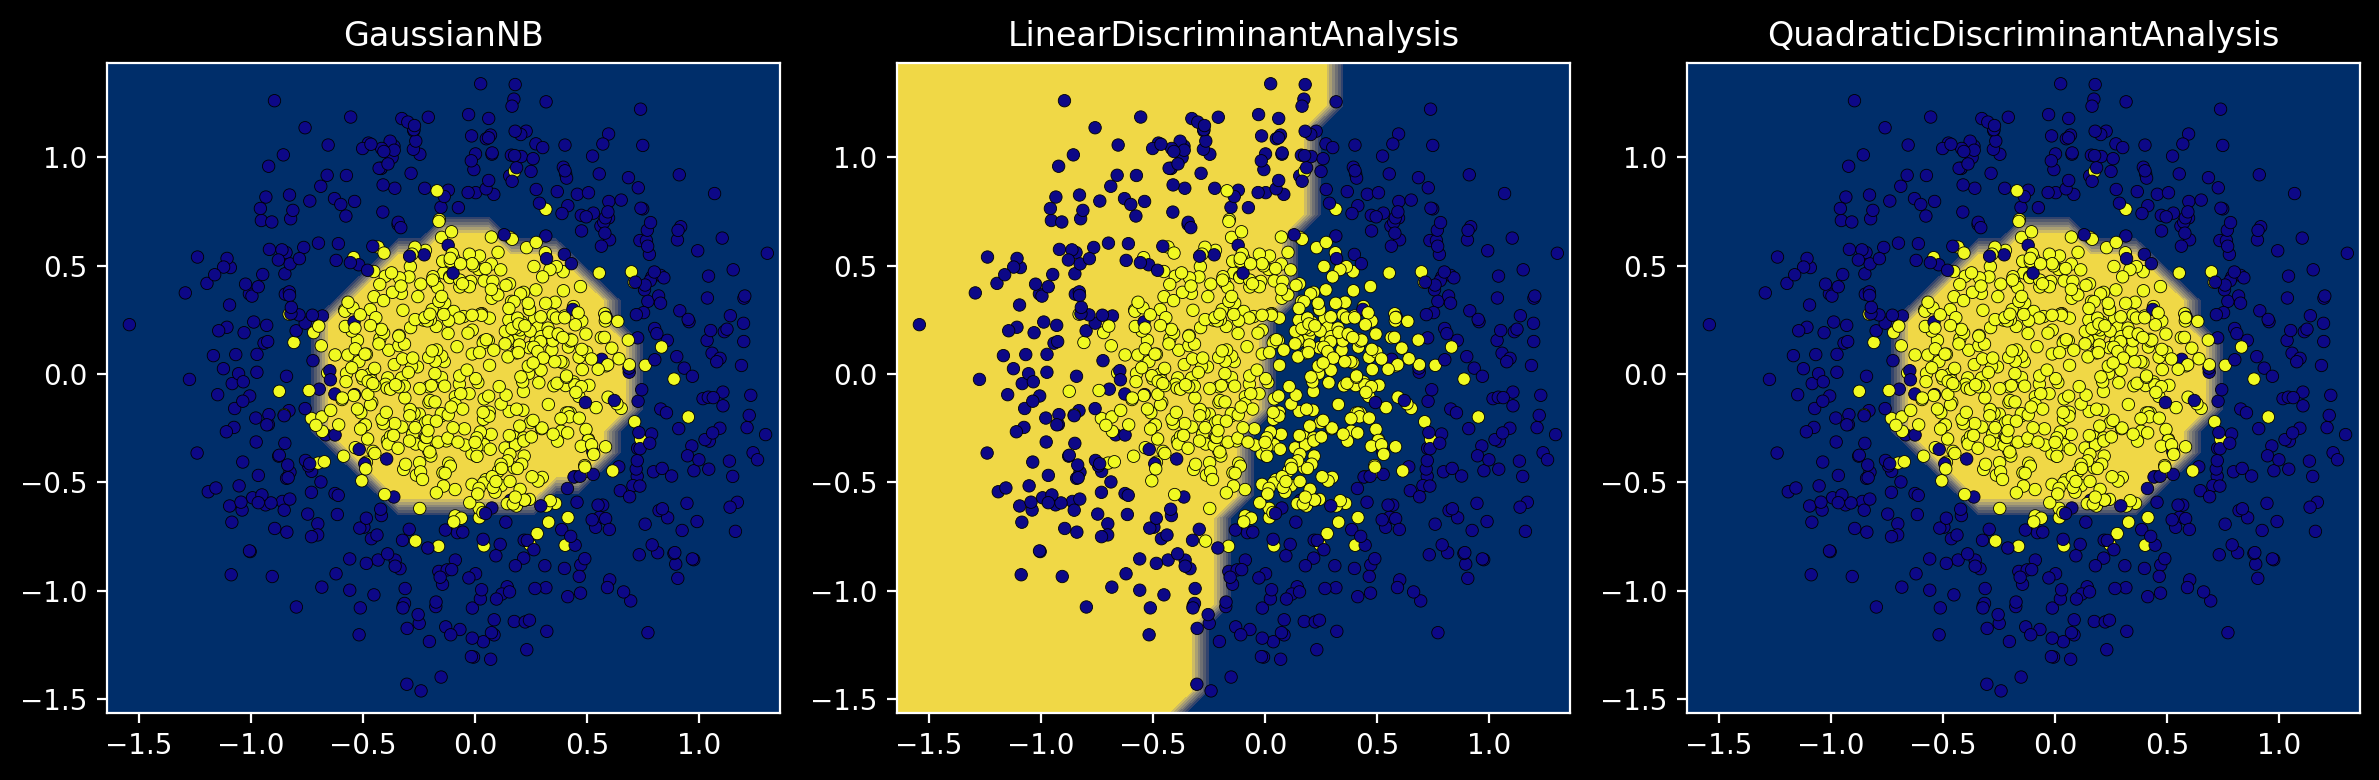

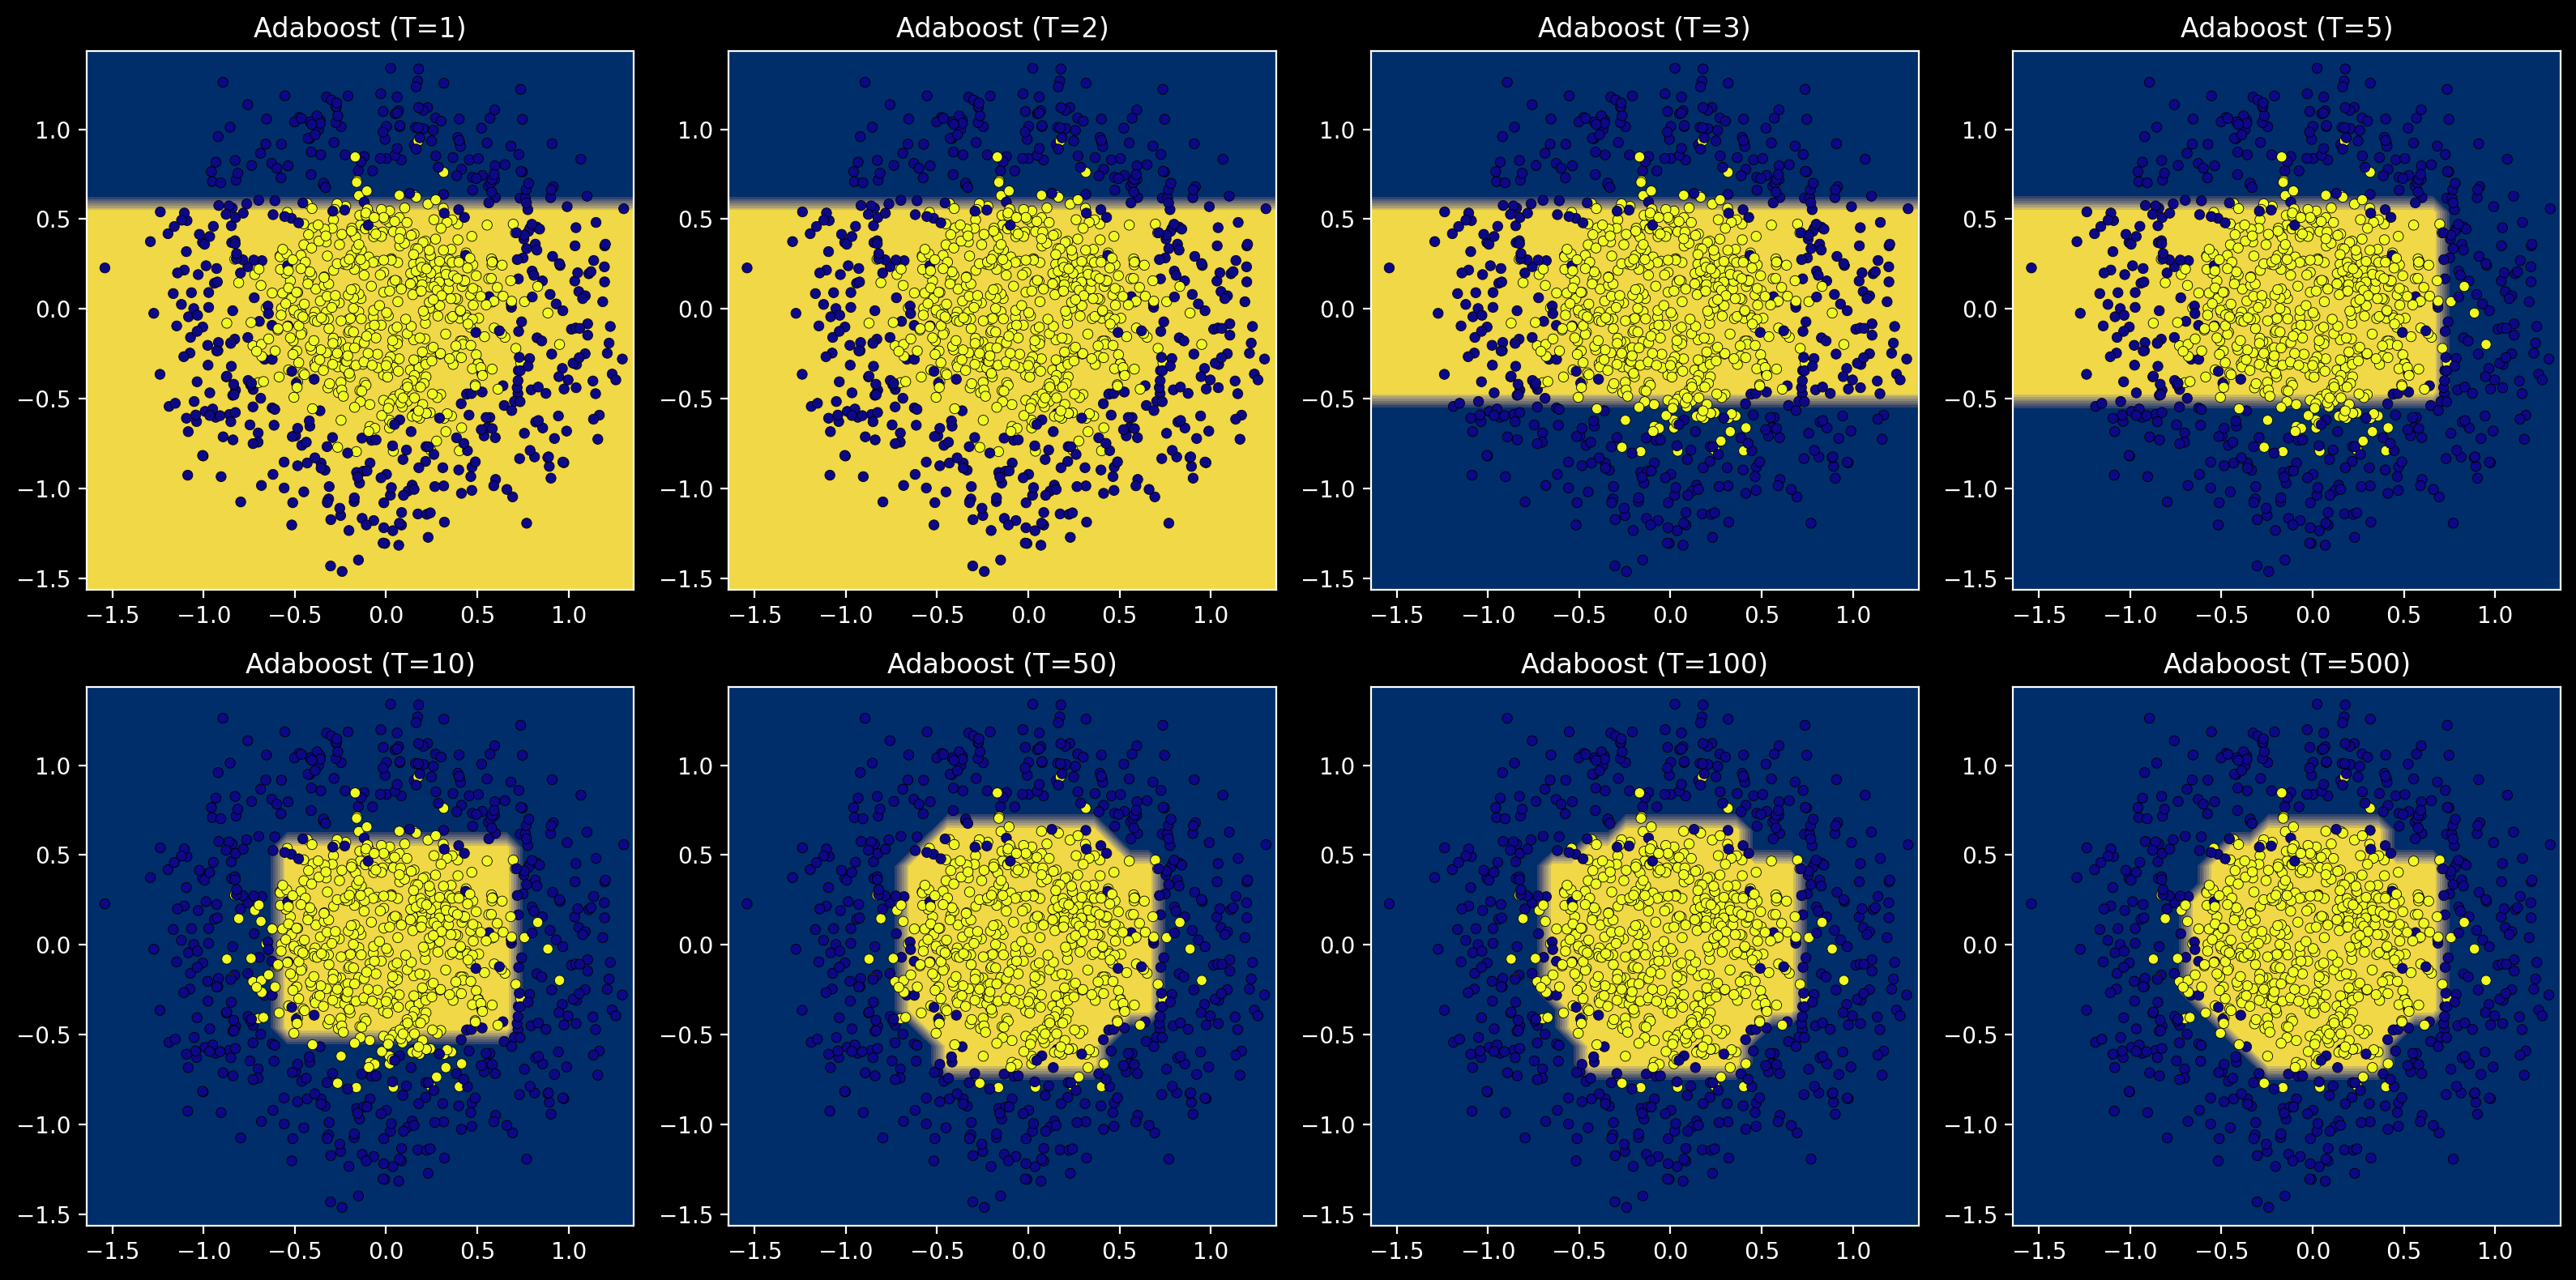

In [96]:
# x_data, y_data = make_circles(n_samples=1000, noise=0.2, factor=0.4, random_state=42)
# y_data = np.where(y_data == 0, -1, 1)  # Convert labels to -1 and 1

# # Pass 1, 2, 3, 5, 10, 50, 100, 500 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 500]

# plot_adaboost_contours(x_data, y_data, T_vals)


x_data, y_data = make_circles(n_samples=1000, noise=0.2, factor=0.4, random_state=42)
y_data = np.where(y_data == 0, -1, 1)  # Convert labels to -1 and 1

# Plot the decision boundaries
plot_classifier_boundaries(x_data, y_data, T_vals, classifiers, adaboost_config)

- It's clear that the third classifier decided to draw it's decision boundary differently, explain why did it do that despite the fact the previous two classifiers did not. In other words, what has changed in the dataset to make draw such boundary?


In [97]:
"""
Answer:

Since, Adaboost is based on training weak classifiers, and let them focus on the data that has drifted away from their predictions, for that we can see the following:
        - At T=1, the classifier have missed vast amount of patterns which is predictable to behave in that way.

        - At T=2, the classifer would focus on the patterns got missed, but the question in here is that why the decision boundary hasn't been drawn correctly, actually the answer is so simple
        because our classifier actually is a stump (one-level decision tree) for which its classification is based on having various splits to correctly split the data points based on certain weights, so
        the stump YES would focus on the missed points, but since the stump needs more trials to drift its splitting away from the axis-alligned splits, and that is achieved with more concentration on the
        weights of the missed points furthermore.

        - At T=3, the classifier has concentrated more on the missed points, such that the splits become more directed to them, for that the decision boundary has changed.
"""

"\nAnswer:\n\nSince, Adaboost is based on training weak classifiers, and let them focus on the data that has drifted away from their predictions, for that we can see the following:\n        - At T=1, the classifier have missed vast amount of patterns which is predictable to behave in that way.\n\n        - At T=2, the classifer would focus on the patterns got missed, but the question in here is that why the decision boundary hasn't been drawn correctly, actually the answer is so simple\n        because our classifier actually is a stump (one-level decision tree) for which its classification is based on having various splits to correctly split the data points based on certain weights, so\n        the stump YES would focus on the missed points, but since the stump needs more trials to drift its splitting away from the axis-alligned splits, and that is achieved with more concentration on the\n        weights of the missed points furthermore.\n\n        - At T=3, the classifier has concent

- Why are the decision boundaries found by Adaboost in the instances above discontinuous?


In [98]:
"""
Answer:

Because the weak classifier we deal with is a stump, which forms decision boundaries that are linear and perpendicular to certain axis, moreover as much we iterate we better combine these classifers
"""

'\nAnswer:\n\nBecause the weak classifier we deal with is a stump, which forms decision boundaries that are linear and perpendicular to certain axis, moreover as much we iterate we better combine these classifers\n'

#### Choosing the Number of Estimators T


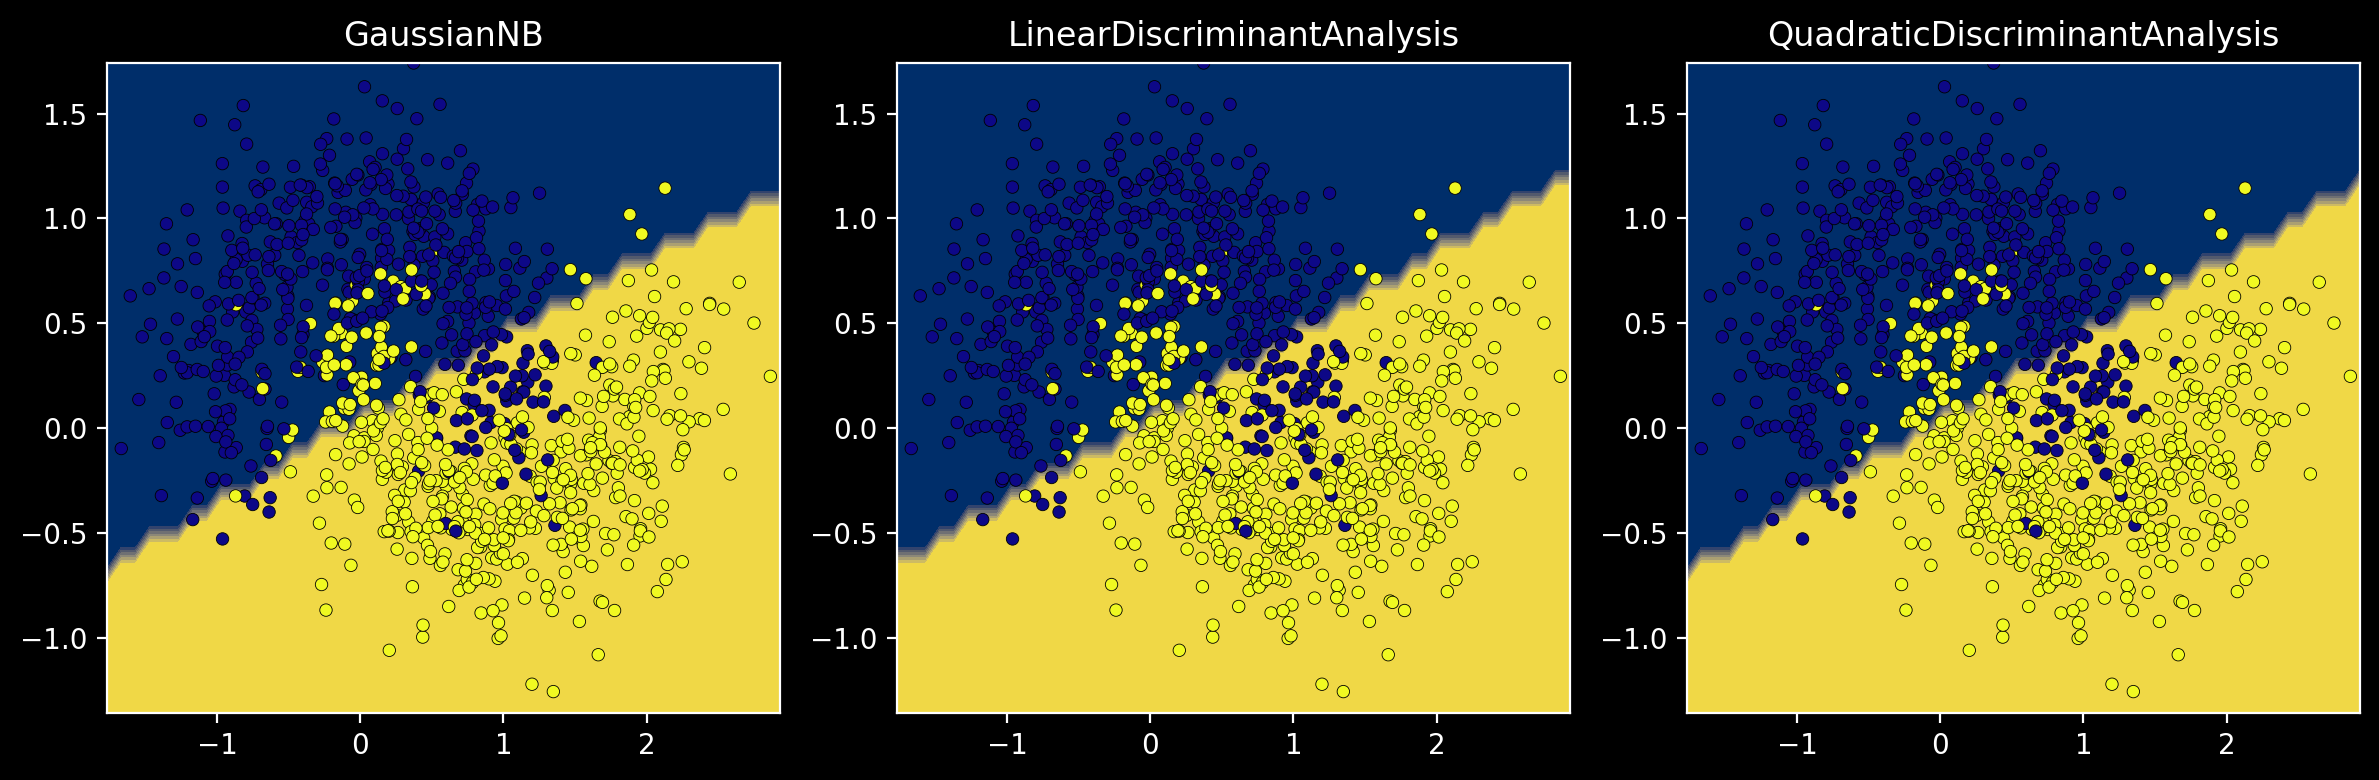

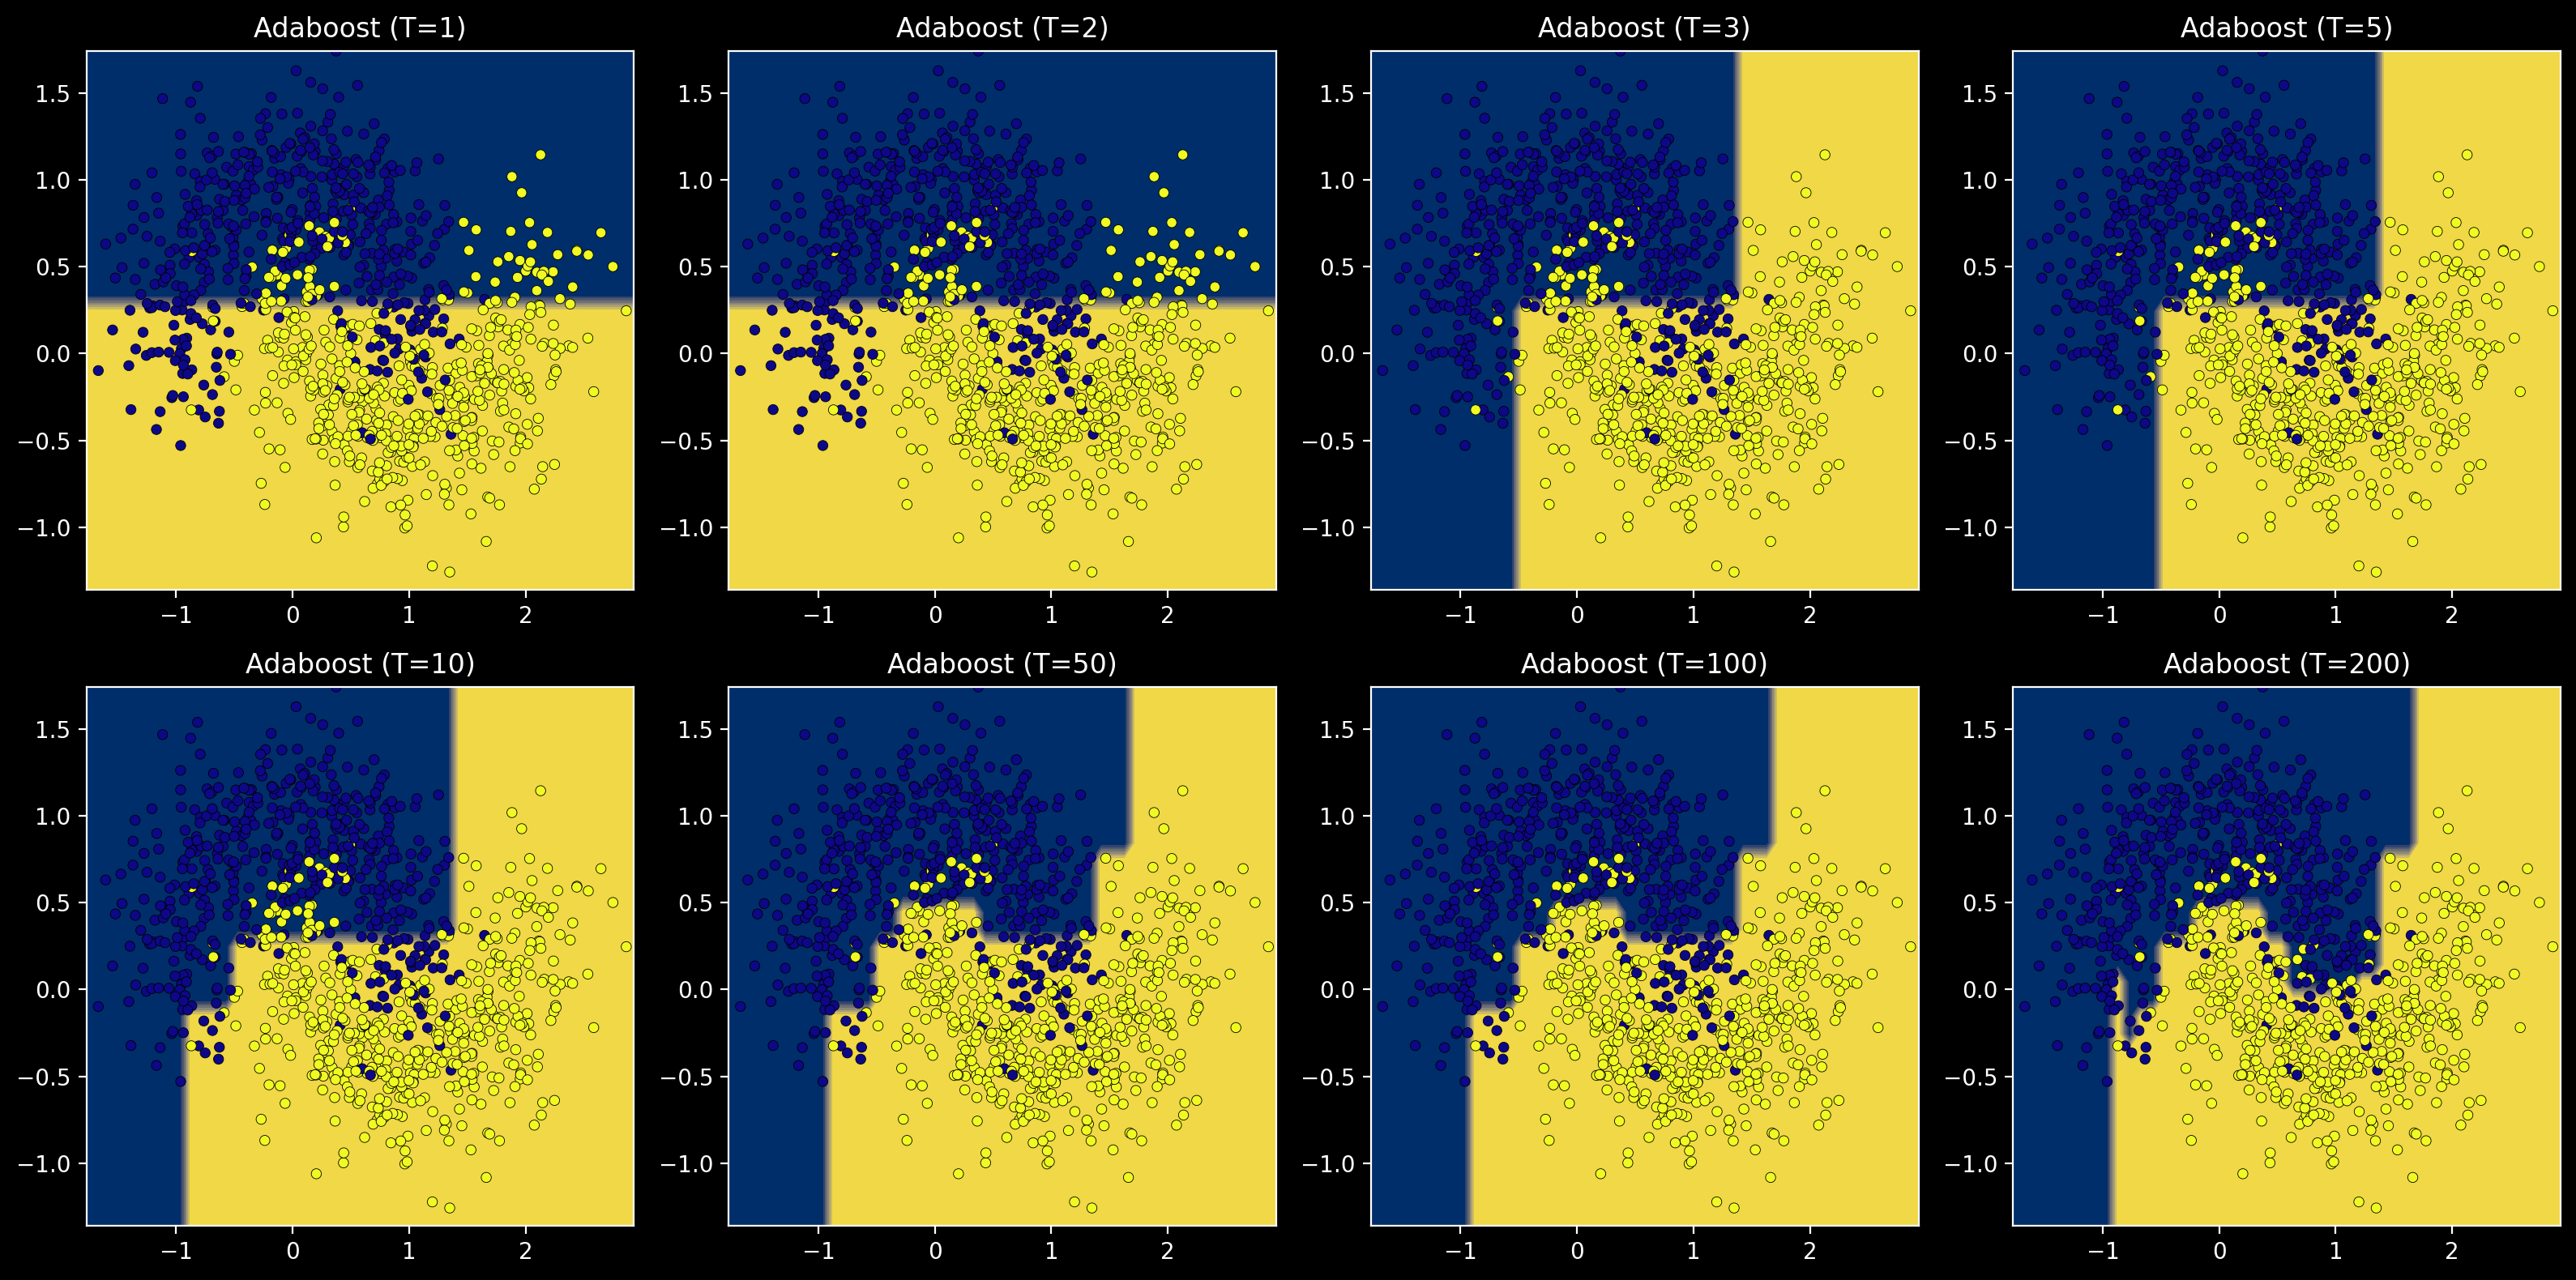

In [99]:
x_data, y_data = make_moons(n_samples=1000, noise=0.3, random_state=42)
y_data = np.where(y_data == 0, -1, 1)  # Convert labels to -1 and 1

# Pass 1, 2, 3, 5, 10, 50, 100, 200 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 200]
plot_classifier_boundaries(x_data, y_data, T_vals, classifiers, adaboost_config)

- What do you think is an optimal value for $T$ given these plots?


In [100]:
"""
Answer:

I think it is at T=50 as the boundary starts to repsond to noise and overfit afterwards
"""

'\nAnswer:\n\nI think it is at T=50 as the boundary starts to repsond to noise and overfit afterwards\n'

- Given these plots how do you imagine the training loss curve? What technique would you use to automatically stop increasing T?


In [101]:
"""
Answer:

A monotonic decreasing function is used that it decreases with a great drop from T=1 to T=10, then starts to slow down from T=10 to T=50, then stops from T=100 to T=200, and from the ways
to stop this automatically is to measure the error on a validation set and when we monitor when the error stops to decrease
"""

'\nAnswer:\n\nA monotonic decreasing function is used that it decreases with a great drop from T=1 to T=10, then starts to slow down from T=10 to T=50, then stops from T=100 to T=200, and from the ways\nto stop this automatically is to measure the error on a validation set and when we monitor when the error stops to decrease\n'

#### Adaboost Robustness


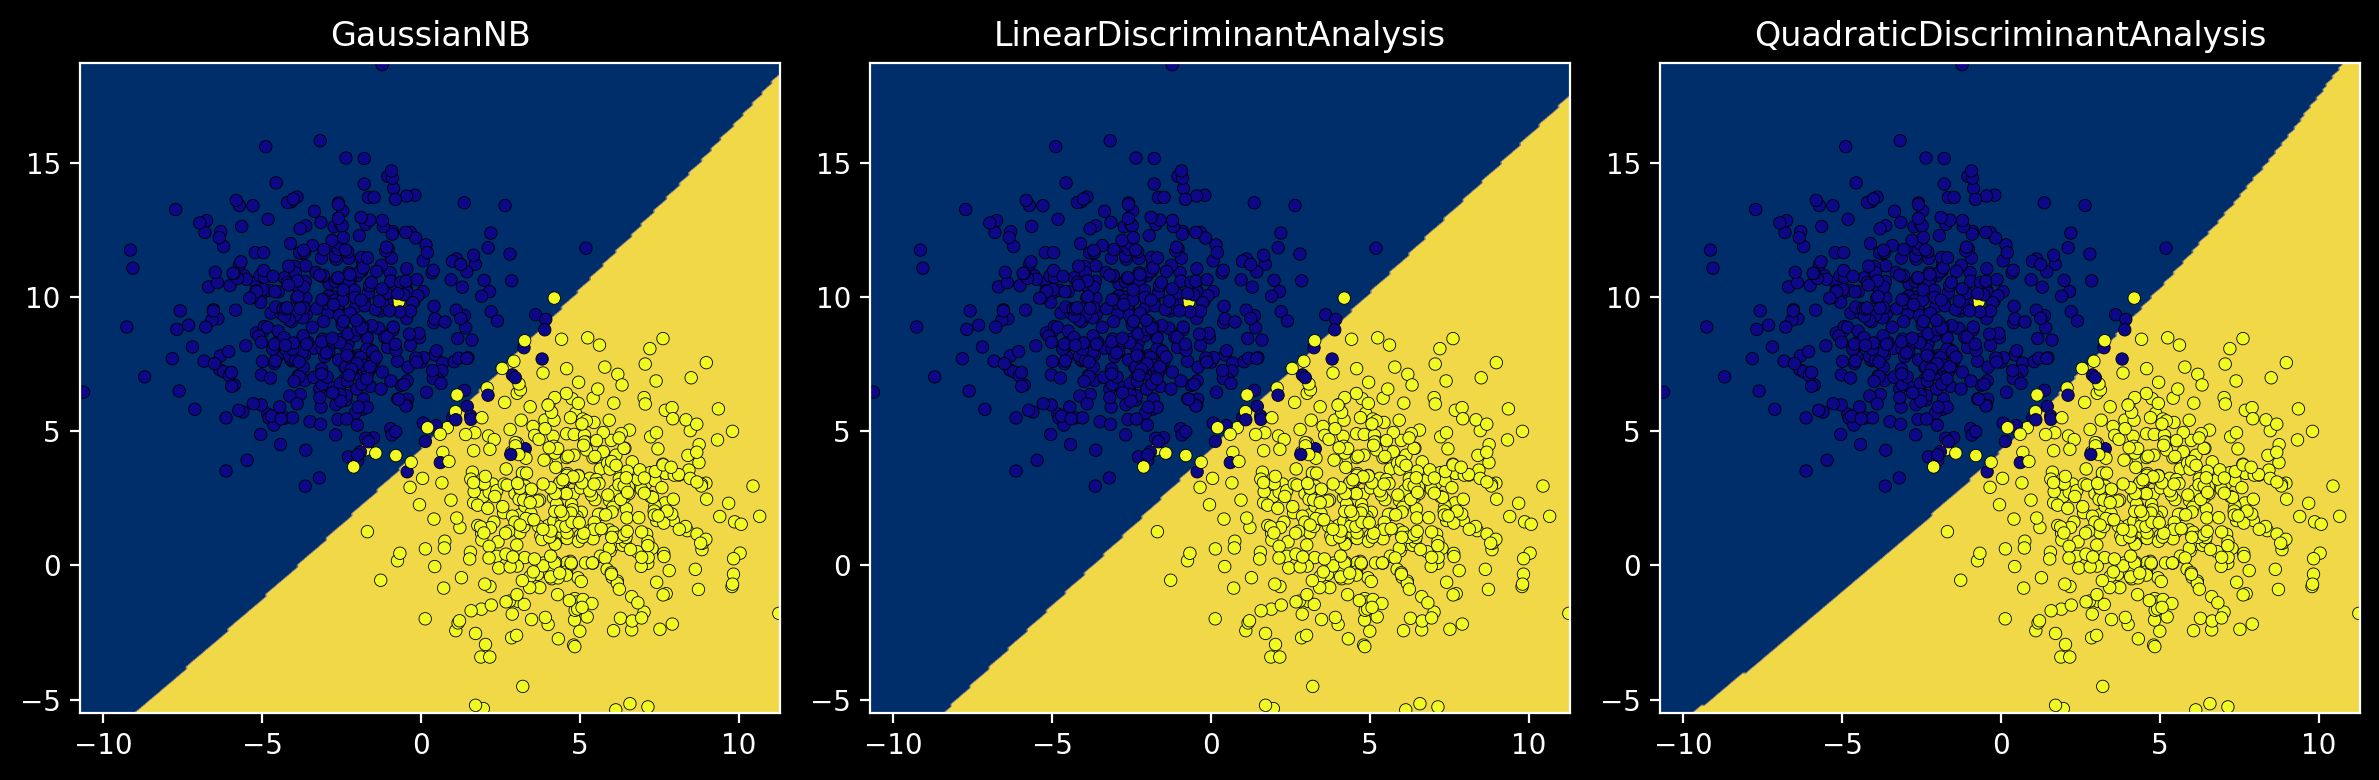

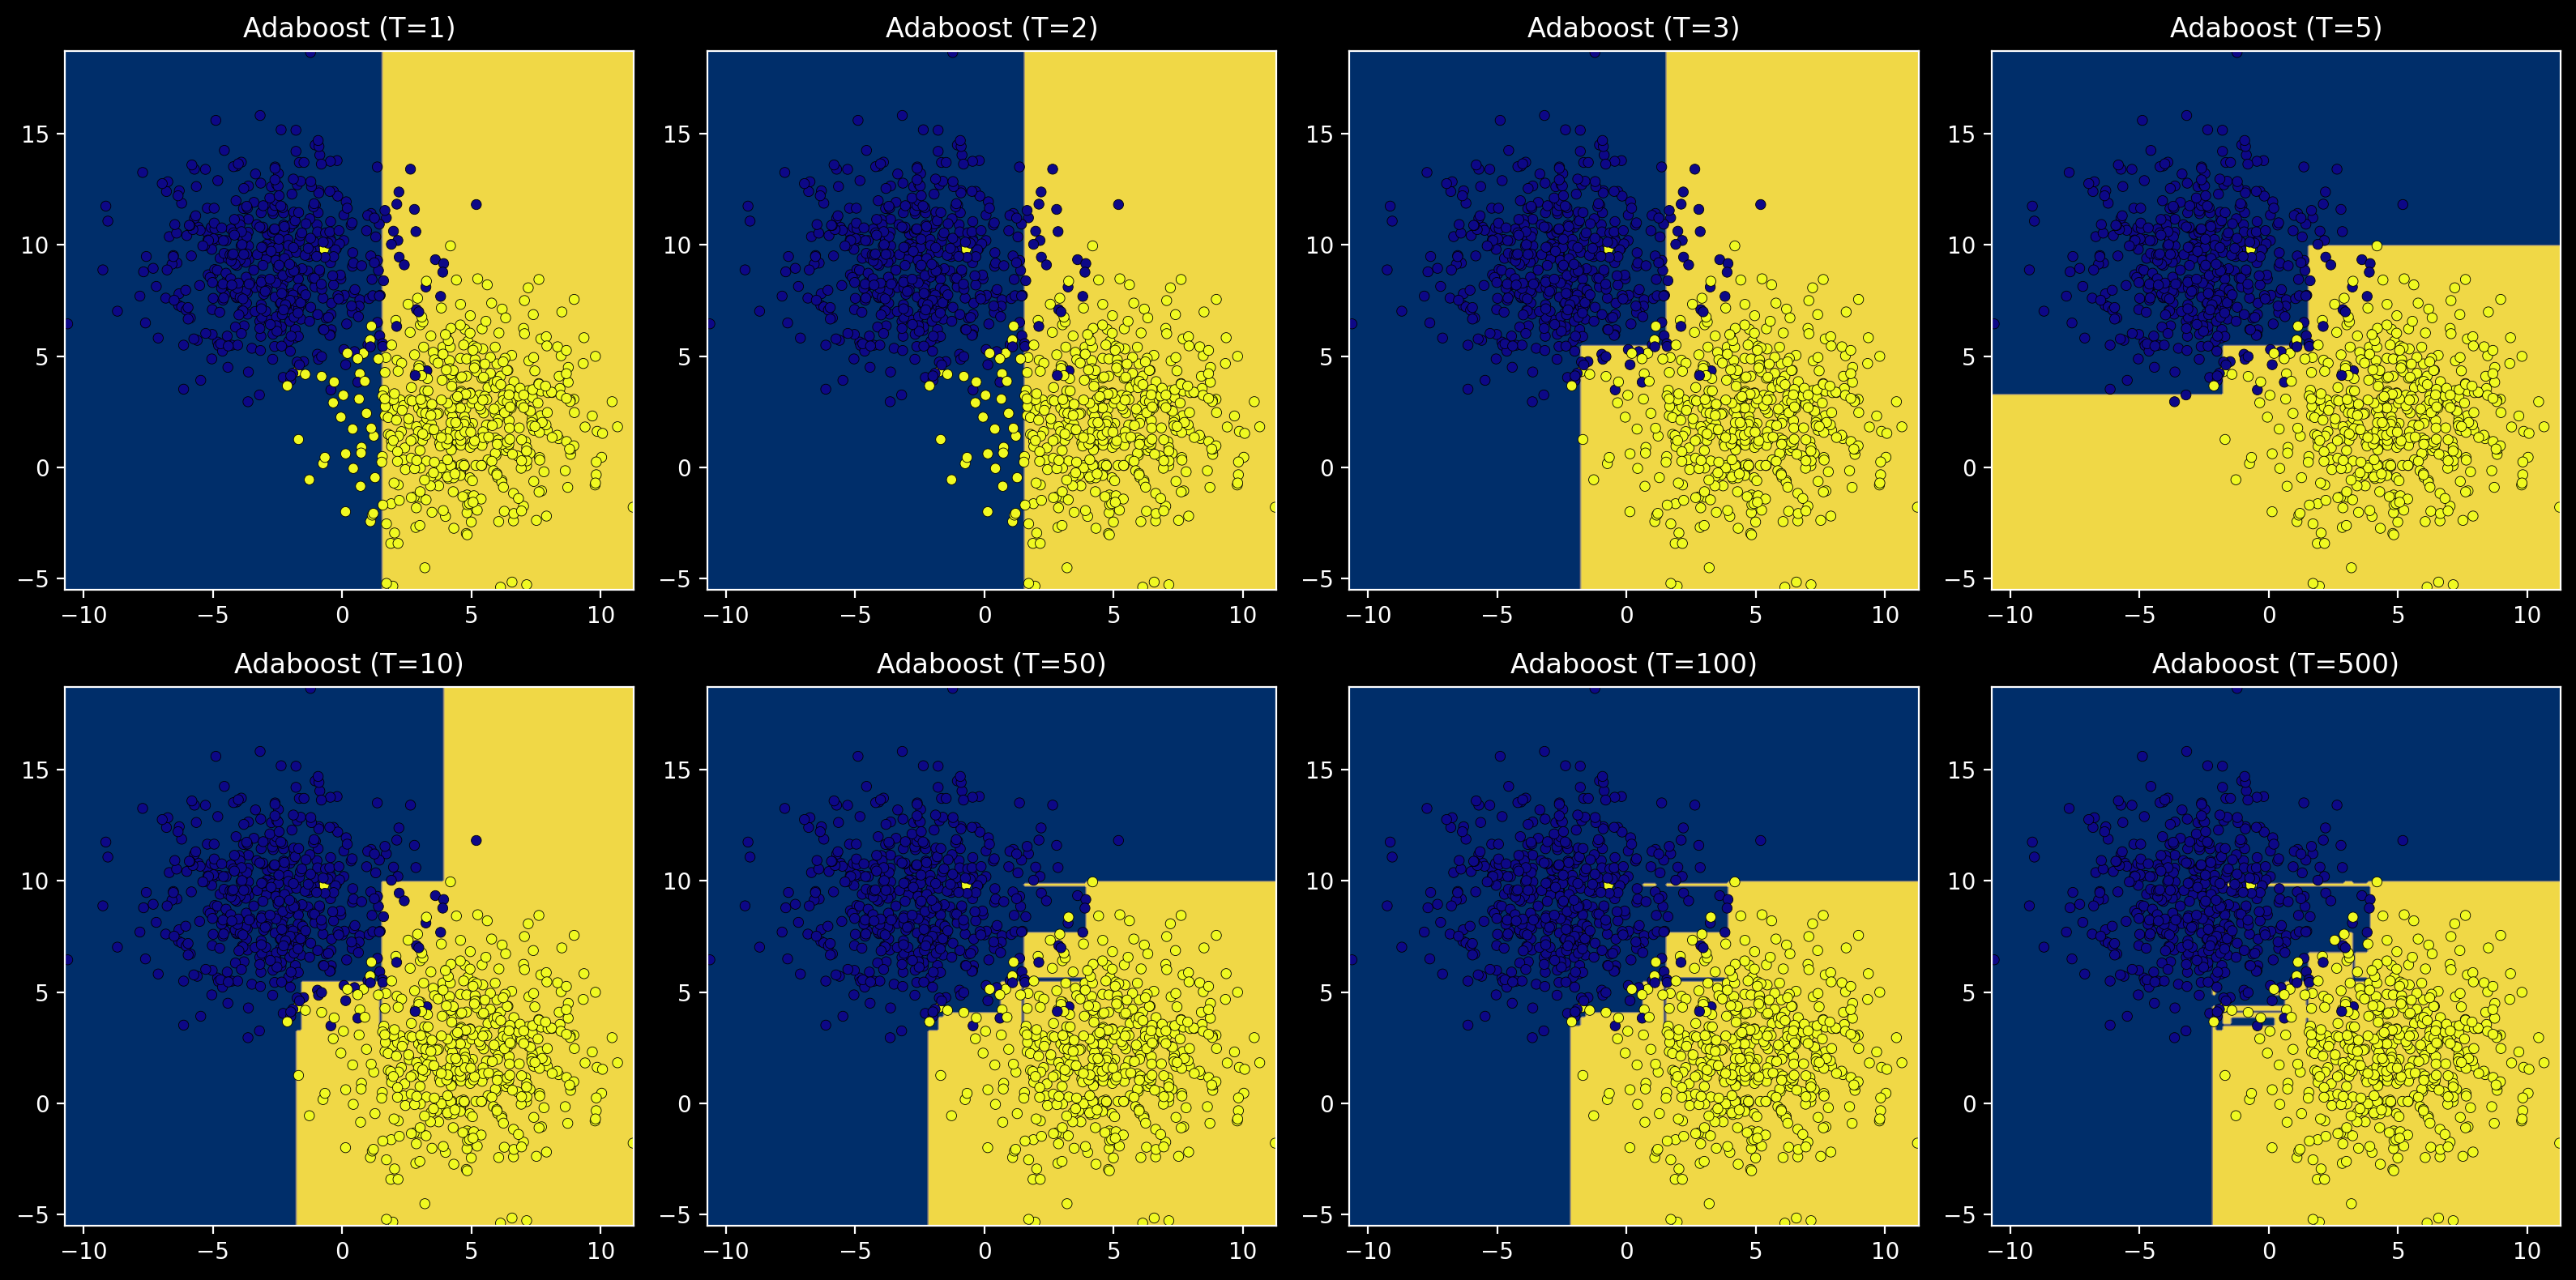

In [102]:
x_data, y_data = make_blobs(
    n_samples=1000, centers=2, n_features=2, cluster_std=2.5, random_state=42
)
y_data = np.where(y_data == 0, -1, 1)  # Convert labels to -1 and 1

# Pass 1, 2, 3, 5, 10, 50, 100, 500 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 500]
plot_classifier_boundaries(x_data, y_data, T_vals, classifiers, adaboost_config)

- How do you imagine the decision boundary from LDA and is it better and worse than that due to Adaboost here and why?


In [103]:
"""
Answer:

Since LDA is based on finding a hyperplane to separate the classes, it is good with data that could be linearly separable, but in the context of having any circular behavior as our dataset, the classifier
won't be that good for that having the Adaboost would improve this as it will combine the results to separate the data and represent the data correctly like we see for sure that it classifies it well at
T=10 and then it overfits
"""

"\nAnswer:\n\nSince LDA is based on finding a hyperplane to separate the classes, it is good with data that could be linearly separable, but in the context of having any circular behavior as our dataset, the classifier\nwon't be that good for that having the Adaboost would improve this as it will combine the results to separate the data and represent the data correctly like we see for sure that it classifies it well at\nT=10 and then it overfits\n"

### ✨ Extra Requirements List


- Make minor modifications to the function above so it itakes an arbitrary list of classifier objects and visualize the decision boundary of GNB, LDA, QDA and Adaboost.

- Let the constructor take the config (object) of the base classifier and try out something different from the decision stump


<div align="center">
    <img src="https://media1.tenor.com/m/eUBg0uKpgZIAAAAd/youve-done-an-amazing-job-lewis-jackson.gif">
</div>
